# 1

아이리스 데이터 가져오자

In [1]:
# 라이브러리 가져오기

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC


## 1. 목적 - SVM을 가지고 iris 데이터를 분류해 보자

## 2. 데이터 수집

In [2]:
df = load_iris()
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

data와 target을 갖고오자

In [4]:
x = df.data
y = df.target

In [7]:
x = pd.DataFrame(x, columns=df.feature_names)
y = pd.DataFrame(y, columns=["species"])

In [8]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## 3. 데이터 전처리

- 스케일링
- 레이블 인코딩


In [10]:
# 스케일링
transformer = MinMaxScaler()
transformer.fit(x)

MinMaxScaler()

In [12]:
x_data = transformer.transform(x)  # x를 변환

In [13]:
x_data

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [15]:
# 레이블 인코딩

le = LabelEncoder()
le.fit(y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [16]:
print(le.classes_)

[0 1 2]


In [17]:
y_data = le.transform(y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
# 훈련, 평가 데이터
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    random_state=0, stratify=y_data)


## 4. 탐색적 데이터 분석 (EDA)

클래스별 비율, 시각화

## 5. 모델 선택

In [29]:
model = SVC(kernel='rbf', C=1.0, gamma='auto', probability=True) #probability=True로 해주면 확률도 생성

## 6. 모델학습

In [30]:
model.fit(x_train, y_train)

SVC(gamma='auto', probability=True)

## 7. 모델평가

In [31]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9464285714285714
0.9736842105263158


In [32]:
# 리스트 정의 
# 꽃 품종 이름 정의
labels = ['세토사', '버시칼라', '버지니카']

## 새로운 데이터 예측

In [33]:
new_test = [[5.3, 3.7, 1.5, 0.2]]
new_test = pd.DataFrame(new_test, 
                        columns=['Sepal length', 'sepal width', 'Petal length', 'Petal width'])
new_test = transformer.transform(new_test)  #new_test에 대해 스케일링 해줘


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Petal length
- Petal width
- Sepal length
- sepal width
Feature names seen at fit time, yet now missing:
- petal length (cm)
- petal width (cm)
- sepal length (cm)
- sepal width (cm)

  warnings.warn(message, FutureWarning)


In [34]:
y_predict = model.predict(new_test)

In [35]:
label = labels[y_predict[0]]

In [40]:
print(label, confidence)

NameError: name 'confidence' is not defined

# 2

In [41]:
# 라이브러리 불러오기

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV

In [42]:
cancer = load_breast_cancer()

In [44]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [45]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df["target"] = cancer.target

In [46]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## 스케일링

In [47]:
# 스케일링 하기 전에 x와 y를 나누어 보자

x = cancer_df.iloc[:, :-1] #행은 전체, 열은 맨 마지막 열만
y = cancer_df.iloc[:, -1]

In [49]:
print(x)
y

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [50]:
# standard scaler를 쓸거야 이번엔

scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [51]:
x_scaled = scaler.transform(x)

In [52]:
x_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                    test_size=0.3,
                                                   random_state=1234)

In [55]:
svc = SVC(kernel = "linear", C=1.0, gamma='auto', random_state=0)

교차검증 - 가지고 있는 데이터셋을 쪼개서 여러 번 학습

In [57]:
score = cross_val_score(svc, x_scaled, y, cv=5)
# cv가 알아서 5개씩 데이터셋을 쪼개준다
score

array([0.95614035, 0.98245614, 0.96491228, 0.96491228, 0.98230088])

In [58]:
print("교차검증 평균:", score.mean())

교차검증 평균: 0.9701443875174661


# 비선형

In [60]:
# 라이브러리 불러오기
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [83]:
x, y = make_moons(n_samples = 300, noise=0.1, random_state=42)

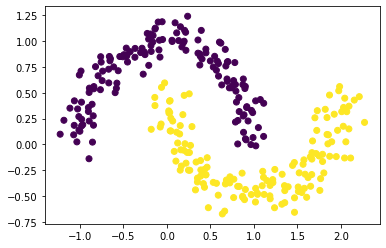

In [84]:
plt.scatter(x[:,0],x[:,1], c=y)
plt.show()

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [86]:
# polynomial 방식 사용
svm = SVC(kernel="poly", C=1.0, gamma="auto", random_state=0)

# 교차검증
score = cross_val_score(svm, x, y, cv=5)
score


array([0.93333333, 0.85      , 0.95      , 0.86666667, 0.9       ])

In [87]:
print("교차검증 평균:", score.mean())

교차검증 평균: 0.9


In [90]:
# 가우시안 함수 적용
svm_1 = SVC(kernel="rbf", C=1.0, gamma="auto", random_state=43)

# 교차검증
score = cross_val_score(svm_1, x, y, cv=5)
score

array([0.98333333, 0.96666667, 1.        , 0.95      , 0.96666667])

In [91]:
print('교차검증 평균:', score.mean())

교차검증 평균: 0.9733333333333334


# 4

In [93]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.datasets import load_boston, make_regression
from sklearn.metrics import mean_squared_error  # 오차값 계산
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [94]:
# 데이터 불러오기

boston = load_boston()
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [95]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [96]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [97]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [98]:
len(y)

506

In [99]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)  #학습과 변환을 동시에!

In [100]:
x_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                    random_state=0)

In [106]:
print(len(x_train))
print(len(y_train))

379
379


In [107]:
print(len(x_test))
print(len(y_test))

127
127


## 선형

In [109]:
svr = SVR(kernel="linear", C=1.0, gamma="auto") # 모델 생성
svr.fit(x_train, y_train)

SVR(gamma='auto', kernel='linear')

In [110]:
pred = svr.predict(x_test)

In [113]:
print("가중치", svr.coef_)  # 선형일 때만 뽑을 수 있음
print("절편값", svr.intercept_) 


가중치 [[ -3.74434697   3.185       -1.31745932   2.29085781  -2.39009279
   11.95269302  -1.72573594  -5.37615624   1.06269643  -3.82215159
   -7.12361368   3.91225253 -11.14905687]]
절편값 [23.97548935]


In [114]:
print("평균 잔차 제곱: ", np.mean(np.square(y_test-pred)))

평균 잔차 제곱:  41.169991649325425


In [116]:
mse = mean_squared_error(y_test, pred)
print("평균 잔차 제곱:", mse)

평균 잔차 제곱: 41.169991649325425


In [118]:
rmse = mean_squared_error(y_test, pred)**0.5
print("rmse:", rmse)

rmse: 6.416384624484837


In [120]:
rmse = mean_squared_error(y_test, pred, squared=False)
print("rmase", rmse)

rmase 6.416384624484837


In [121]:
svr.score(x_test, y_test) # r2값

0.4960772608018382

## 다항식

In [123]:
svr = SVR(kernel='poly', C=1, gamma='auto')
svr.fit(x_train, y_train)

SVR(C=1, gamma='auto', kernel='poly')

In [124]:
pred = svr.predict(x_test)

In [127]:
mse = mean_squared_error(y_test, pred)
print("평균 잔차 제곱:", mse)

rmse = mean_squared_error(y_test, pred, squared=False)
print("rmase", rmse)

평균 잔차 제곱: 74.35611698708063
rmase 8.622999303437327


In [128]:
print("mse:", mse)
print("rmse:", rmse)

mse: 74.35611698708063
rmse: 8.622999303437327


# 가우시안

In [126]:
# 모델정의
# 모델학습
# 예측값 저장
# mse
# rmse

In [137]:
# 모델정의
svr = SVR(kernel="rbf", C=1, gamma="auto") # 모델 생성
svr.fit(x_train, y_train)

# 모델학습
svr.fit(x_train, y_train)

# 예측값 저장
pred = svr.predict(x_test)

# mse
mse = mean_squared_error(y_test, pred)
print("평균 잔차 제곱:", mse)
# rmse
rmse = mean_squared_error(y_test, pred, squared=False)
print("rmase", rmse)

평균 잔차 제곱: 59.61621497312026
rmase 7.721153733291435


In [138]:
svr.score(x_test, y_test)

0.27029457266422663

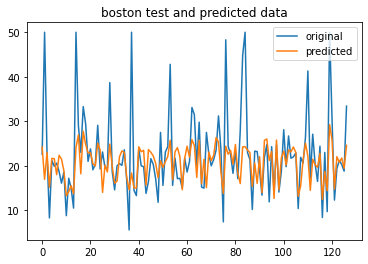

In [146]:
x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label='original')
plt.plot(x_ax, pred, label="predicted")
plt.title('boston test and predicted data')
plt.legend()
plt.show()

In [152]:
kernel_list = ['linear', 'poly', 'rbf']

for kernel in kernel_list:
    svr = SVR(kernel=kernel, C=10, gamma="auto")
    svr.fit(x_train, y_train)
    
    pred = svr.predict(x_test)
    
    print("커널: ", kernel)
    print("절편: ", svr.intercept_)
    print("mse: ", mean_squared_error(y_test, pred))
    print("rmse: ", mean_squared_error(y_test, pred)**0.5)
    print("R2: ", svr.score(x_test, y_test))


커널:  linear
절편:  [19.18507847]
mse:  34.72552808504732
rmse:  5.89283701497397
R2:  0.5749578143767617
커널:  poly
절편:  [23.69251404]
mse:  61.568893032915746
rmse:  7.846584800594189
R2:  0.24639369638895992
커널:  rbf
절편:  [27.38941576]
mse:  37.55673550990886
rmse:  6.128355041110858
R2:  0.5403036951112852


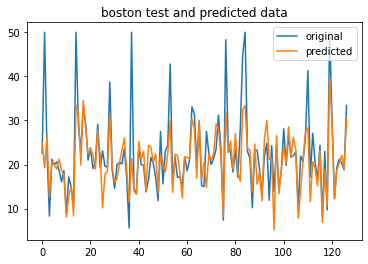

In [153]:
x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, pred, label="predicted")
plt.title("boston test and predicted data")
plt.legend()
plt.show()